In [25]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import folium

In [27]:
df=pd.read_csv('data/7. Base de Atractivos turísticos (2021).csv', delimiter=';',encoding='latin-1',dtype={"Latitud":str})

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   442 non-null    int64 
 1   Codigo               442 non-null    object
 2   Nombre               442 non-null    object
 3   Direccion Atractivo  439 non-null    object
 4   Tipo de Patrimonio   442 non-null    object
 5   Nombre Propietario   442 non-null    object
 6   Latitud              442 non-null    object
 7   Longitud             442 non-null    object
dtypes: int64(1), object(7)
memory usage: 27.8+ KB


In [29]:
df.columns=["id","codigo","nombre","direccion_atractivo","tipo_patrimonio","tipo_propiedad","latitud","longitud"]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   442 non-null    int64 
 1   codigo               442 non-null    object
 2   nombre               442 non-null    object
 3   direccion_atractivo  439 non-null    object
 4   tipo_patrimonio      442 non-null    object
 5   tipo_propiedad       442 non-null    object
 6   latitud              442 non-null    object
 7   longitud             442 non-null    object
dtypes: int64(1), object(7)
memory usage: 27.8+ KB


In [31]:
df["latitud"]=df["latitud"].str.replace(",",".")
df["longitud"]=df["longitud"].str.replace(",",".")

In [32]:
df["latitud"]=df["latitud"].astype(float)
df["longitud"]=df["longitud"].astype(float)

In [33]:
df["direccion_atractivo"]=df["direccion_atractivo"].fillna("No se encuentra direccion")

In [34]:
df["tipo_propiedad"].value_counts()

Instituto Distrital de Patrimonio Cultural - IDPC     38
Instituto Distrital de Recreación y Deporte - IDRD    33
Arquidiócesis de Bogotá                               25
No aplica                                             19
Instituto Distrital de las Artes - Idartes            10
                                                      ..
Museo Colonial                                         1
Fundación Universidad América                          1
Embajada de Suiza                                      1
Policía Nacional de Colombia                           1
Sociedad Económica de Amigos del País                  1
Name: tipo_propiedad, Length: 202, dtype: int64

In [35]:
some_map=folium.Map(location=[df["latitud"].mean(),df["longitud"].mean()],zoom_start=10)

In [36]:
for row in df.itertuples():
    
    some_map.add_child(folium.Marker(location=[row.latitud,row.longitud],popup=row.nombre))

In [37]:
some_map

<AxesSubplot:title={'center':'# Tipos de propiedad'}, ylabel='tipo_patrimonio'>

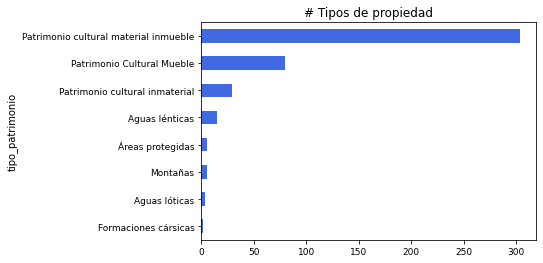

In [38]:
df.groupby(["tipo_patrimonio"])["tipo_patrimonio"].count().sort_values(ascending=True).plot.barh(
                                                                                                title="# Tipos de propiedad",
                                                                                                color="royalblue",fontsize=9)


In [39]:
df["tipo_patrimonio"].value_counts()

Patrimonio cultural material inmueble    304
Patrimonio Cultural Mueble                80
Patrimonio cultural inmaterial            29
Aguas lénticas                            15
Áreas protegidas                           5
Montañas                                   5
Aguas lóticas                              3
Formaciones cársicas                       1
Name: tipo_patrimonio, dtype: int64